### Below is the demonstration for web scraping (Task No.3), preliminary analysis (Task No.1) and preliminary analysis on a JSON file (Task No.2)

# Task No.3 (Choice 2)
## Web Scraping
Main idea was to obtain at least 100 reviews so that the data corpus is sufficient for further discourse analysis. Since API access could not fulfil the requirement for data amount, web scraping was chosen. 

As a result of web scraping with Beautiful Soup 124 successful data records of 150 requested data records were obtained, with 26 separated at the very beginning. 

Data was successfully saved both in txt and csv files.

In [7]:
import requests
from bs4 import BeautifulSoup # Importing library for web scraping
import time
from datetime import datetime # Importing standard library for date and time

In [9]:
def get_tripadvisor_reviews(location_url, max_reviews=150, output_file="tripadvisor_reviews.txt"):
    headers = {
        'Access-Control-Allow-Origin': '*',
        'Access-Control-Allow-Methods': 'GET',
        'Access-Control-Allow-Headers': 'Content-Type',
        'accept': '*/*',
        'accept-encoding': 'gzip, deflate',
        'accept-language': 'en,mr;q=0.9',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.69 Safari/537.36'
        }
    reviews = []
    current_url = location_url
    reviews_scraped = 0

    with open(output_file, "w", encoding="utf-8") as file:  # Opening file for writing
        file.write(f"Data extracted at {datetime.now()}" + "\n")
        file.write("\n")
        counter = 10
        while reviews_scraped < max_reviews:
            try:
                # Fetching the page
                response = requests.get(current_url, headers=headers)
                response.raise_for_status()
                time.sleep(3)
                soup = BeautifulSoup(response.text, "html.parser")
                # Finding all reviews on the current page
                review_containers = soup.find_all("div", class_="_c")

                for review in review_containers:
                    if reviews_scraped >= max_reviews:
                        break

                    # Extracting review title
                    title_tag = review.find("span", class_="yCeTE")
                    title = title_tag.get_text(strip=True) if title_tag else "No title" # first attempt for scraping revealed empty data

                    # Extracting review text
                    text_tag = review.find("span", class_="JguWG")
                    text = text_tag.get_text(strip=True) if text_tag else "No review text"

                    # Extracting date tag
                    date_tag = review.find("div", class_="RpeCd")
                    date = date_tag.get_text(strip=True) if date_tag else "No review date"
              
                    # Extracting rating tag
                    svg_tag = review.find("svg", class_="UctUV d H0") 
                    # rating_tag = svg_tag.find("title")
                    rating = svg_tag.get_text(strip=True) if svg_tag else "No rating info"

                    # Adding to the list
                    reviews.append({"title": title, "text": text, "date": date, "rating": rating})
                    reviews_scraped += 1

                    # Saving to file
                    file.write(f"Title: {title}\n")
                    file.write(f"Text: {text}\n")
                    file.write(f"Date: {date}\n")
                    file.write(f"Rating: {rating}\n")
                    file.write("-" * 50 + "\n")
                current_url = f"https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or{counter}-Alberta_Iela-Riga_Riga_Region.html"
                print(f"Scraping: {current_url}")
                counter = counter + 10
            except requests.exceptions.RequestException as e:
                print(f"Error: {e}")
                break

    return reviews

In [10]:
# scraping 
location_url = "https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-Alberta_Iela-Riga_Riga_Region.html"
reviews = get_tripadvisor_reviews(location_url, max_reviews=150, output_file="alberta_iela_reviews.txt")

if isinstance(reviews, list):
    print(f"Scraped {len(reviews)} reviews and saved them to 'alberta_iela_reviews.txt'.")
else:
    print(reviews)


Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or10-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or20-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or30-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or40-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or50-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or60-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or70-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadvisor.com/Attraction_Review-g274967-d4355971-Reviews-or80-Alberta_Iela-Riga_Riga_Region.html
Scraping: https://www.tripadviso

# Task No.1 
## Preliminary analysis

Below is the demonstration for perliminary analysis.

As a result, all text was transformed into lower text (not necessary for particular discourse analysis), average word count was calculated before and after removing punctuation and stop words to highlight focus on core content. Most used terms were extracted (both words and amount of word usage), word cloud was created and sentiment analysis performed by calculating sentiment polarity. 

In [13]:
import pandas as pd # Importing Pandas for data analysis


def txt_to_dataframe(file_path):
    reviews = []
    with open(file_path, "r", encoding="utf-8") as file:
        review = {}
        for line in file:
            if line.startswith("Title:") and "No title" not in line:
                # Extracting the title
                review["Title"] = line.replace("Title:", "").strip()
            elif line.startswith("Text:") and "No review text" not in line:
                # Extracting the text
                review["Text"] = line.replace("Text:", "").strip()
            elif line.startswith("Date:") and "No review date" not in line:
                # Extracting the date
                review["Date"] = line.replace("Date:", "").strip()
            elif line.startswith("Rating:") and "No rating info" not in line:
                # Extracting the rating
                review["Rating"] = line.replace("Rating:", "").strip()
            elif line.startswith("-" * 50):
                # Saving the review when a separator line is reached
                if review:
                    reviews.append(review)
                    review = {}
    
    # Createing a DataFrame from the list of reviews
    df = pd.DataFrame(reviews)
    return df

# Usage
file_path = "alberta_iela_reviews.txt"  # Choosing txt file as a destination
df = txt_to_dataframe(file_path)

# Saving additionally as a CSV
df.to_csv("reviews.csv", index=False)

In [14]:
from IPython.display import display
display(df)

,Title,Text,Date,Rating
0,"The father of Sergei Einsenstein, the film maker",I thought this was very mediocre. They had att...,Dec 2024 • Friends,3.0 of 5 bubbles
1,Alberta Iela,"If you’re visiting Central Riga, don’t miss th...",Jul 2024 • Couples,5.0 of 5 bubbles
2,Solo trip,It is a truly marvellous piece of history and ...,May 2024 • Solo,5.0 of 5 bubbles
3,Unparalleled collection of beautiful Art nouve...,"The street, and other surrounding streets, hig...",Jan 2024 • Solo,5.0 of 5 bubbles
4,Fantastic,Incredible collection of Art Nouveau buildings...,Sep 2023 • Couples,5.0 of 5 bubbles
...,...,...,...,...
119,Must see,"Alberta iela, along with Elisabetes iela, is o...",Jun 2018 • Business,5.0 of 5 bubbles
120,Well Worth the Time to Take a Walk on Alberta ...,Riga has numerous historic beautiful and vari...,Jul 2018 • Solo,5.0 of 5 bubbles
121,astonishing,The street with Art Nouveau buildings is excep...,Jul 2018 • Friends,5.0 of 5 bubbles
122,Home of art nouveau,Nearly all of the buildings on this street wer...,Jul 2018 • Solo,5.0 of 5 bubbles


In [15]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# Downloading NLTK data files
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\maara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\maara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\maara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [19]:
def text_to_lower(text): #Not neceseraly for particular project, but the text was changed to lower for study purposes
    words = word_tokenize(text)
    lower = [word.lower() for word in words]
    return " ".join(lower)

In [20]:
df["Text"] = df["Text"].apply(text_to_lower)
df["Title"] = df["Title"].apply(text_to_lower)
df["Date"] = df["Date"].apply(text_to_lower)
df["Rating"] = df["Rating"].apply(text_to_lower)

In [21]:
# Cleaning ratings, however, this data could be used for additional analysis on how sentiment or themes vary by travel tipe (e.g. solo, family)
def clean_dates_and_ratings(text):
    words = word_tokenize(text)
    lower = [word.lower() for word in words if word not in ["friends", "solo", "family", "business", "couples", "of", "5", "bubbles", "•"]]
    return " ".join(lower)

In [22]:
df["Date"] = df["Date"].apply(clean_dates_and_ratings)
df["Rating"] = df["Rating"].apply(clean_dates_and_ratings)

In [23]:
display(df)

,Title,Text,Date,Rating
0,"the father of sergei einsenstein , the film maker",i thought this was very mediocre . they had at...,dec 2024,3.0
1,alberta iela,"if you ’ re visiting central riga , don ’ t mi...",jul 2024,5.0
2,solo trip,it is a truly marvellous piece of history and ...,may 2024,5.0
3,unparalleled collection of beautiful art nouve...,"the street , and other surrounding streets , h...",jan 2024,5.0
4,fantastic,incredible collection of art nouveau buildings...,sep 2023,5.0
...,...,...,...,...
119,must see,"alberta iela , along with elisabetes iela , is...",jun 2018,5.0
120,well worth the time to take a walk on alberta ...,riga has numerous historic beautiful and varie...,jul 2018,5.0
121,astonishing,the street with art nouveau buildings is excep...,jul 2018,5.0
122,home of art nouveau,nearly all of the buildings on this street wer...,jul 2018,5.0


In [29]:
# Implementing function to count words in a text
def count_words(text):
    words = word_tokenize(text)
    return len([word for word in words if word.isalnum()])  # Counting only alphanumeric words

# Implementing function to calculate average word count
def calculate_average_word_count(text_series):
    word_counts = text_series.apply(count_words)  # Counting words for each entry
    return word_counts.mean()  # Computeing the average

# Calculating the average word count and review lenght, before removing stop words
average_word_count = calculate_average_word_count(df["Text"])
print(f"Average Word Count: {average_word_count:.2f}")

Average Word Count: 24.44


In [30]:
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

In [31]:
# Removing stop words from the 'Text' column
df["Text"] = df["Text"].apply(remove_stopwords)
# Removing stop words from the 'Title' column, however, this could alse be left as is
df["Title"] = df["Title"].apply(remove_stopwords)

# Removing stop words to focus on core content words

In [32]:
display(df)

,Title,Text,Date,Rating
0,"father sergei einsenstein , film maker",thought mediocre . attempted recreate experien...,dec 2024,3.0
1,alberta iela,"’ visiting central riga , ’ miss street renown...",jul 2024,5.0
2,solo trip,truly marvellous piece history art . seeing co...,may 2024,5.0
3,unparalleled collection beautiful art nouveau ...,"street , surrounding streets , highlight impre...",jan 2024,5.0
4,fantastic,incredible collection art nouveau buildings al...,sep 2023,5.0
...,...,...,...,...
119,must see,"alberta iela , along elisabetes iela , one key...",jun 2018,5.0
120,well worth time take walk alberta explore near...,riga numerous historic beautiful varied unique...,jul 2018,5.0
121,astonishing,street art nouveau buildings exceptional . nev...,jul 2018,5.0
122,home art nouveau,nearly buildings street built art nouveau styl...,jul 2018,5.0


In [33]:
def remove_punctuation(text):
    bad_chars = string.punctuation
    words = word_tokenize(text)
    text_without_punct = [word for word in words if word not in bad_chars]
    return " ".join(text_without_punct)

# Removing punctuation to focus on meaningful words

In [35]:
# Removing punctuation
df["Text"] = df["Text"].apply(remove_punctuation)
df["Title"] = df["Title"].apply(remove_punctuation)

In [36]:
display(df)

,Title,Text,Date,Rating
0,father sergei einsenstein film maker,thought mediocre attempted recreate experience...,dec 2024,3.0
1,alberta iela,’ visiting central riga ’ miss street renowned...,jul 2024,5.0
2,solo trip,truly marvellous piece history art seeing colo...,may 2024,5.0
3,unparalleled collection beautiful art nouveau ...,street surrounding streets highlight impressiv...,jan 2024,5.0
4,fantastic,incredible collection art nouveau buildings al...,sep 2023,5.0
...,...,...,...,...
119,must see,alberta iela along elisabetes iela one key art...,jun 2018,5.0
120,well worth time take walk alberta explore near...,riga numerous historic beautiful varied unique...,jul 2018,5.0
121,astonishing,street art nouveau buildings exceptional never...,jul 2018,5.0
122,home art nouveau,nearly buildings street built art nouveau styl...,jul 2018,5.0


In [37]:
# Analysing the most commonly used terms
def get_most_common_terms(text_series, top_n=50):
    all_words = []
    for text in text_series:
        all_words.extend(text.split())  # Splitting by space to get words
    term_frequencies = Counter(all_words)
    return term_frequencies.most_common(top_n)

In [ ]:
%pip install wordcloud

In [38]:
most_common_terms = get_most_common_terms(df["Text"], top_n=50)
print(most_common_terms)

[('art', 115), ('buildings', 104), ('street', 104), ('nouveau', 89), ('riga', 63), ('architecture', 37), ('one', 33), ('’', 32), ('beautiful', 32), ('see', 30), ('museum', 29), ('area', 26), ('visit', 26), ('worth', 25), ('iela', 25), ('time', 25), ('walk', 23), ('alberta', 22), ('old', 22), ('many', 19), ('amazing', 19), ('must', 19), ('also', 18), ('town', 17), ('tour', 16), ('streets', 15), ('around', 15), ('city', 15), ('interesting', 15), ("'s", 13), ('best', 13), ('go', 13), ('style', 13), ('much', 13), ('great', 13), ('get', 12), ('building', 12), ('lots', 12), ('walking', 12), ('house', 11), ('really', 11), ("n't", 11), ('well', 11), ('would', 10), ('examples', 10), ('short', 10), ('take', 10), ('nice', 10), ('guide', 10), ('along', 9)]


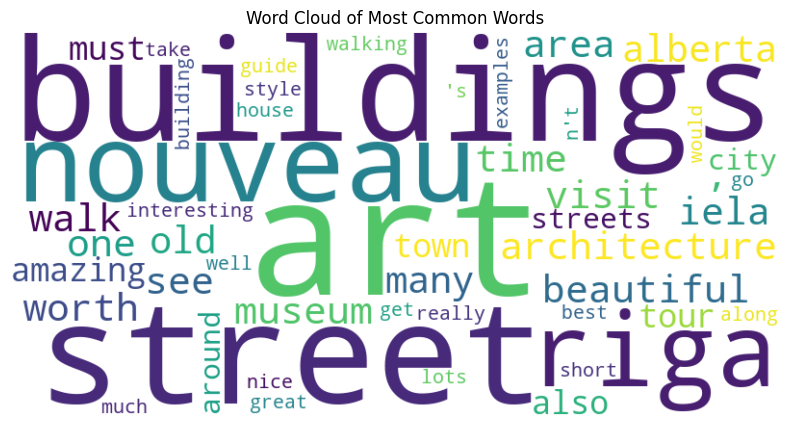

In [39]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

word_elements = [t[0] for t in most_common_terms]

# Counting word frequencies
word_freq = Counter(word_elements)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(word_freq)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Most Common Words")
plt.show()


In [41]:
# Implementing function to count words in the text
def count_words(text):
    words = word_tokenize(text)
    return len([word for word in words if word.isalnum()])  # Counting only alphanumeric words

# Implementing function to calculate average word count
def calculate_average_word_count(text_series):
    word_counts = text_series.apply(count_words)  # Counting words for each entry
    return word_counts.mean()  # Computing the average

# Calculating average word count
average_word_count = calculate_average_word_count(df["Text"])
print(f"Average Word Count: {average_word_count:.2f}")

# Average word count - focusing on core content, after removing stop words

Average Word Count: 24.44


In [306]:
%pip install textblob

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: textblob in c:\users\maara\appdata\local\programs\python\python312\lib\site-packages (0.19.0)




[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Average Sentiment: 0.38


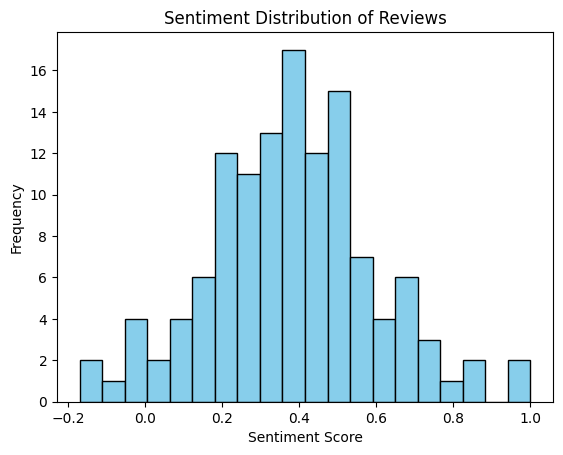

In [43]:
from textblob import TextBlob
import matplotlib.pyplot as plt

# Implementing function to calculate sentiment polarity
def get_sentiment(text):
    if isinstance(text, str):  # Checking if text is a string
        return TextBlob(text).sentiment.polarity
    return None  # Return None for non-string entries

# Applying the sentiment function to each review
df["Sentiment"] = df["Text"].apply(get_sentiment)

# Calculating average sentiment and ignoring NaN values
average_sentiment = df["Sentiment"].mean()
print(f"Average Sentiment: {average_sentiment:.2f}")

# Plotting sentiment distribution
plt.hist(df["Sentiment"].dropna(), bins=20, color="skyblue", edgecolor="black")
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()

# Task No.2
## Preliminary analysis on a JSON file

JSON file was successfully transformed into table like format with each entry containing key terms (title, text, date, rating), and after sentiment analysis, additional term (Sentiment) with sentiment score was added to the table.

In [45]:
import json
records = df.to_dict(orient='records')

# Creating a new dictionary with numeric keys
nested_dict = {str(i): record for i, record in enumerate(records)}

# Saving as JSON file
with open('alberta_iela_reviews.json', 'w') as json_file:
    json.dump(nested_dict, json_file, indent=4)

print("Data saved to alberta_iela_reviews.json")

Data saved to alberta_iela_reviews.json
